## Bayer and Hanck (2013) Combined Cointegration Approach

* Existing applied economics literature provides many cointegration approaches to examine long-run relationship between macroeconomic variables. 
* Before proceeding to cointegration approach, it is necessary to examine unit root properties of the variables, which helps in choosing suitable cointegration test for empirical model for reliable empirical results.
* Existing cointegration approaches include Engle and Granger (1987) (EG), Johansen (1991) (JOH), Phillips and Ouliaris (1990), Peter Boswijk (1994) (BO) and Banerjee $\it{et}$ $\it{al}$. (1998)(BDM). 
* These cointegration approaches may provide ambiguous empirical results due to their explanatory power properties. 
* Bayer and Hanck (2009 and 2013) developed a new cointegration approach known as the combined cointegration approach. This test combines the results of previous cointegration approaches (Johansen, Phillips and Ouliaris, Boswijk, and Banerjee) and provides Fisher F-statistics for more conclusive and reliable empirical findings. 
* The Bayer and Hanck combined cointegration approach, the order of integration must be unique, i.e. $I(1)$. If the calculated F-statistic exceeds the critical value, we may reject the null of no cointegration; the reverse applies for the acceptance of the null hypothesis. 



The Fisher's formulas of computing Bayer and Hanck cointegration are as follows:

$$𝐸𝐺−𝐽𝑂𝐻=−2[\ln⁡(𝑃_{𝐸𝐺})+\ln⁡(𝑃_{𝐽𝑂𝐻})]$$ 

$$𝐸𝐺−𝐽𝑂𝐻−𝐵𝑂−𝐵𝐷𝑀=−2[\ln⁡(𝑃_{𝐸𝐺})+\ln(𝑃_{𝐽𝑂𝐻})+\ln(𝑃_{𝐵𝑂})+\ln(𝑃_{𝐵𝐷𝑀})]$$

* Where $𝑃_{𝐸𝐺},𝑃_{𝐽𝑂𝐻},𝑃_{𝐵𝑂},𝑃_{𝐵𝐷𝑀}$ are the p-values of various individual cointegration tests such as Engle and Granger (1987), Johansen (1991), Peter Boswijk (1994) and Banerjee$\it{et}$ $\it{al}$.(1998), respectively. 
* The Fisher statistic is used to examine whether cointegration exists or not between the variables. We may reject the null hypothesis in favor of cointegration between the variables if the Fisher statistic exceeds the Bayer and Hanck critical bounds and vice versa.


### A joint test-Statistics for the Null of Non-Cointegration
* Bayer, C., & Hanck, C., 2013. Combining non cointegration tests. Journal of Time Series Analysis,34,83–95. 
* Bayerhanck produces a joint test-statistic for the null of non-cointegration based on Engle-Granger, Johansen maximum eigenvalue, Boswijk and Banerjee tests. https://rdrr.io/github/jens-klenke/bayerhanck/

In [2]:
library(readxl)
library(bayerhanck)
dataset <- read_excel("Book2Q.xlsx")

In [6]:
# dataframe attributes
str(dataset)

tibble [187 x 4] (S3: tbl_df/tbl/data.frame)
 $ Date : chr [1:187] "1973Q1" "1973Q2" "1973Q3" "1973Q4" ...
 $ LREP : num [1:187] 7.02 7 6.98 7.02 7.1 ...
 $ LRGDP: num [1:187] 8.64 8.65 8.64 8.65 8.64 ...
 $ LUNEM: num [1:187] 1.69 1.58 1.57 1.5 1.72 ...


In [5]:
# descriptive statistics
summary(dataset[,2:4])

      LREP           LRGDP           LUNEM      
 Min.   :6.899   Min.   :8.621   Min.   :1.272  
 1st Qu.:7.247   1st Qu.:8.951   1st Qu.:1.616  
 Median :7.344   Median :9.305   Median :1.775  
 Mean   :7.400   Mean   :9.284   Mean   :1.801  
 3rd Qu.:7.487   3rd Qu.:9.641   3rd Qu.:1.990  
 Max.   :8.000   Max.   :9.859   Max.   :2.413  

In [8]:
# model LRGDP = f(LREP,LUNEM) Test Statistics
englegranger(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const")
johansen(LRGDP ~ LREP + LUNEM, data = dataset, type = "eigen", lags = 2, trend = "const")
banerjee(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const")
boswijk(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const")

----------------------------------------------------------
Engle-Granger Test
----------------------------------------------------------
Value of test statistic: -1.6877
----------------------------------------------------------
Johansen Test
----------------------------------------------------------
Value of test statistic: 18.2717
----------------------------------------------------------
Banerjee Test
----------------------------------------------------------
Value of test statistic: -0.5336
----------------------------------------------------------
Boswijk Test
----------------------------------------------------------
Value of test statistic: 5.6453


In [17]:
# EG-JOH：lag 2, constant trend, significance level is 1%
egj1 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "eg-j", crit = 0.01)
summary(egj1)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 4.4554
Critical 1 % Value of the Fisher Type Test: 16.679
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen
Test Statistics       -1.6877  18.2717
p-Values               0.8453   0.1275
 
Value of the Fisher Type Test statistic: 4.4554
1% Critical value for the Test statistic: 16.679

In [18]:
# EG-JOH：lag 2, constant trend, significance level is 5%
egj2 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "eg-j", crit = 0.05)
summary(egj2)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 4.4554
Critical 5 % Value of the Fisher Type Test: 10.895
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen
Test Statistics       -1.6877  18.2717
p-Values               0.8453   0.1275
 
Value of the Fisher Type Test statistic: 4.4554
5% Critical value for the Test statistic: 10.895

In [20]:
# EG-JOH：lag 2, constant trend, significance level is 10%
egj3 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "eg-j", crit = 0.10)
summary(egj3)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 4.4554
Critical 10 % Value of the Fisher Type Test: 8.479
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen
Test Statistics       -1.6877  18.2717
p-Values               0.8453   0.1275
 
Value of the Fisher Type Test statistic: 4.4554
10% Critical value for the Test statistic: 8.479

In [9]:
# EG-JOH-BO-BDM：lag 2, constant trend, significance level is 1%
bh1 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "all", crit = 0.01)
summary(bh1)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 5.6672
Critical 1 % Value of the Fisher Type Test: 32.077
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen Banerjee Boswijk
Test Statistics       -1.6877  18.2717  -0.5336  5.6453
p-Values               0.8453   0.1275   0.9426  0.5788
 
Value of the Fisher Type Test statistic: 5.6672
1% Critical value for the Test statistic: 32.077

In [10]:
#EG-JOH-BO-BDM：lag 2, constant trend, significance level is 5%
bh2 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "all", crit = 0.05)
summary(bh2)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 5.6672
Critical 5 % Value of the Fisher Type Test: 21.106
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen Banerjee Boswijk
Test Statistics       -1.6877  18.2717  -0.5336  5.6453
p-Values               0.8453   0.1275   0.9426  0.5788
 
Value of the Fisher Type Test statistic: 5.6672
5% Critical value for the Test statistic: 21.106

In [12]:
# EG-JOH-BO-BDM：lag 2, constant trend, significance level is 10%
bh3 = bayerhanck(LRGDP ~ LREP + LUNEM, data = dataset, lags = 2, trend = "const", test = "all", crit = 0.10)
summary(bh3)

----------------------------------------------------------
Bayer-Hanck Test for Non-Cointegration
----------------------------------------------------------
Value of the Fisher Type Test statistic: 5.6672
Critical 10 % Value of the Fisher Type Test: 16.444
----------------------------------------------------------
Bayerhanck Test for Non-Cointegration
----------------------------------------------------------
Formula: LRGDP ~ LREP + LUNEM
Lags: 2
Trend: const
 
Underlying Tests:
                Engle-Granger Johansen Banerjee Boswijk
Test Statistics       -1.6877  18.2717  -0.5336  5.6453
p-Values               0.8453   0.1275   0.9426  0.5788
 
Value of the Fisher Type Test statistic: 5.6672
10% Critical value for the Test statistic: 16.444

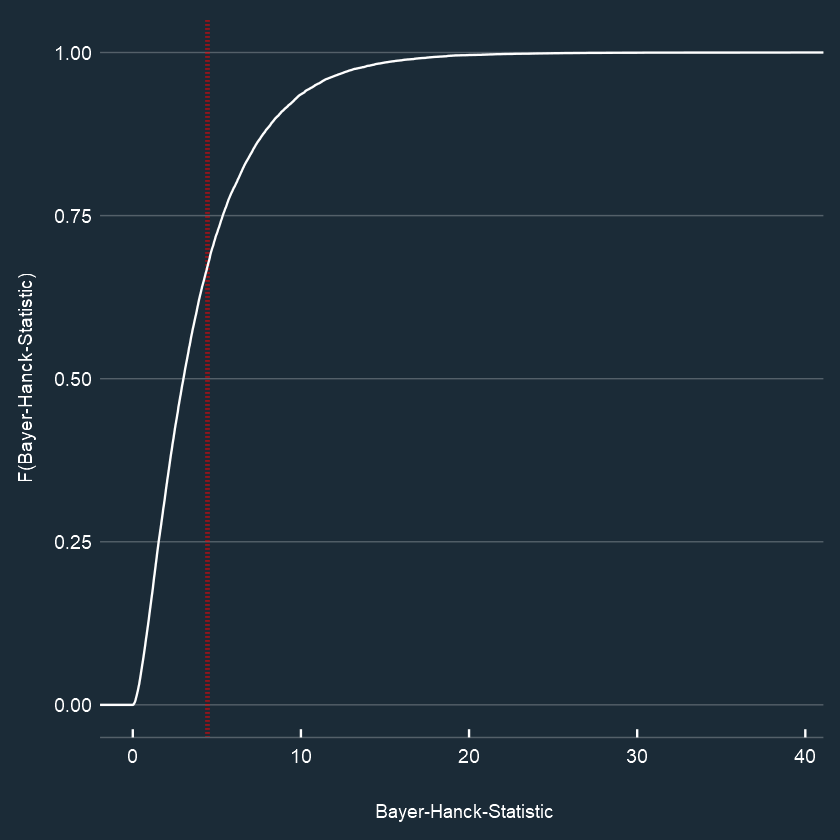

In [23]:
# Bayer-Hanck Fisher Statistics with EG-JOH test
plot(egj2)

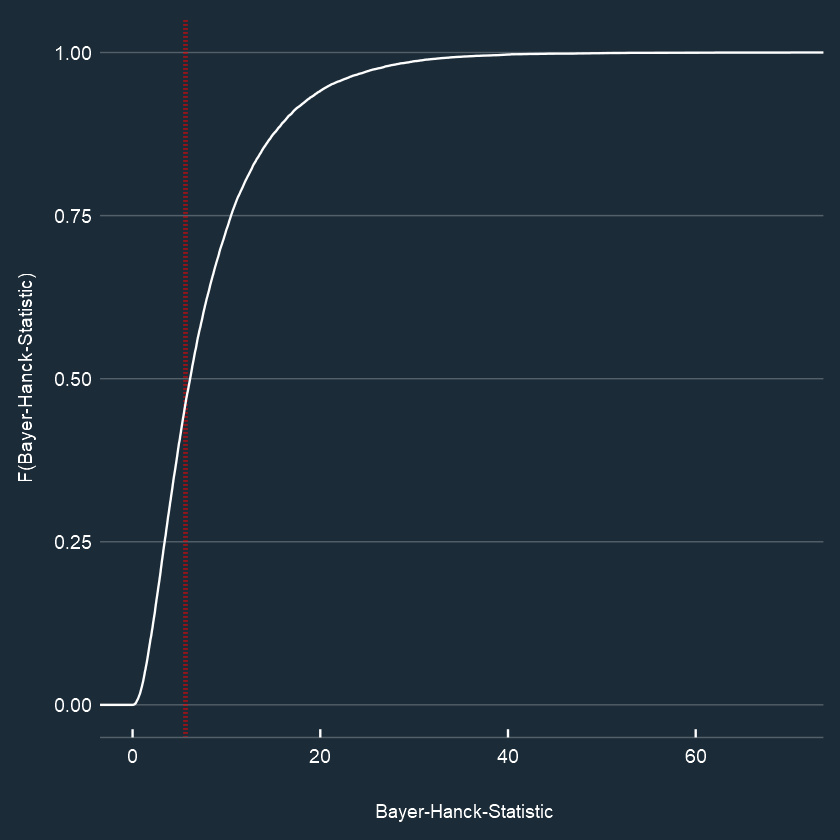

In [21]:
# Bayer-Hanck Fisher Statistics with EG-JOH-BO-BDM test
plot(bh2)

## Empirical Results 
<table style="height: 137px;" width="657">
<tbody>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">&nbsp;<strong>Estimated models</strong>&nbsp;</td>
<td style="height: 22px; width: 70px;">&nbsp;EG-JOH</td>
<td style="height: 22px; width: 146px;">&nbsp;&nbsp;EG-JOH-BO-BDM&nbsp;</td>
<td style="height: 22px; width: 54px;">&nbsp;&nbsp;Lags&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;Cointegration&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">&nbsp;$LRGDP_{t}= LREP_{t} + LUNEM_{t}$</td>
<td style="height: 22px; width: 70px;">&nbsp;4.4554&nbsp;</td>
<td style="height: 22px; width: 146px;">&nbsp;5.6672&nbsp;</td>
<td style="height: 22px; width: 54px;">&nbsp;2&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;No&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">&nbsp;<strong>Significance Level</strong></td>
<td style="height: 22px; width: 70px;">&nbsp;</td>
<td style="height: 22px; width: 146px;">&nbsp;</td>
<td style="height: 22px; width: 54px;">&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">1%</td>
<td style="height: 22px; width: 70px;">16.679</td>
<td style="height: 22px; width: 146px;">32.077</td>
<td style="height: 22px; width: 54px;">&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">5%</td>
<td style="height: 22px; width: 70px;">10.895</td>
<td style="height: 22px; width: 146px;">21.106</td>
<td style="height: 22px; width: 54px;">&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 281.333px;">10%</td>
<td style="height: 22px; width: 70px;">&nbsp;8.479</td>
<td style="height: 22px; width: 146px;">&nbsp;16.444</td>
<td style="height: 22px; width: 54px;">&nbsp;</td>
<td style="height: 22px; width: 104.667px;">&nbsp;</td>
</tr>
</tbody>
</table>